In [1]:
from dbo.simulator.TestFunctions import *
from dbo.acquisition.DEI import DiverseExpectedImprovement
from dbo.acquisition.Wrappers import (EIWrapper, DEIWrapper, KGWrapper)
from dbo.tester.Tester import *
from dbo.metrics.ExperimentMetric import *
from botorch.acquisition import ExpectedImprovement
from dbo.plotter.Plotter import *
from dbo.plotter.SimPlotter import *
import pickle
import json

/hpc/home/bys7/.conda/envs/test/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'dbo.acquisition.AltDEI'

In [2]:
exp_2d = open("results/experiment_2d.pkl",'rb')
exp_hd = open("results/experiment_hd.pkl",'rb')
#exp_lunar = open("results/experiment_lunar.pkl",'rb')

In [3]:
experiment_2d_list = pickle.load(exp_2d)
experiment_hd_list = pickle.load(exp_hd)
#experiment_lunar_list = pickle.load(exp_lunar)

In [5]:
metrics = ExperimentMetrics()
df_2d = metrics.get_dataframe(experiment_2d_list, 0.3)
df_hd = metrics.get_dataframe(experiment_hd_list, 0.3)

In [6]:
plotter_2d = Plotter(experiment_2d_list)
plotter_hd = Plotter(experiment_hd_list)

In [7]:
plotter_lunar = SimPlotter(experiment_lunar_list)

NameError: name 'experiment_lunar_list' is not defined

In [8]:
minima_2d = {
    'Branin2DSimulator':[np.array([-3.14, 12.275]), np.array([3.14, 2.275]), np.array([9.42, 2.475])],
    'SixHumpCamel2DSimulator':[np.array([0.09, -0.71]), np.array([-0.09, 0.71])],
    'Griewank2DSimulator':[np.array([0, 0])],
    'Gramacy2DSimulator':[np.array([0.8, 0]), np.array([-0.8, 0])],
    'HolderTable2DSimulator':[np.array([8.05, 9.66]), np.array([-8.05, 9.66]), np.array([8.05, -9.66]), np.array([-8.05, -9.66])]
}


In [9]:
df_2d.groupby(['sim', 'acqf'])[['num_sol', 'curr_max', 'avg_dist']].mean()

num_sol   curr_max   avg_dist
sim                     acqf                                        
Branin2DSimulator       AltDEIWrapper     5.81  -0.432377   3.393674
                        CDEIWrapper       2.54  -0.462471   2.520917
                        DEIWrapper        4.05  -0.436582   3.880872
                        EIWrapper         6.44  -0.426403   3.587916
Gramacy2DSimulator      AltDEIWrapper    12.31   0.421461   0.236413
                        CDEIWrapper       5.09   0.406844   0.460917
                        DEIWrapper       12.35   0.424359   0.325575
                        EIWrapper         9.49   0.418402   0.241751
Griewank2DSimulator     AltDEIWrapper    23.98  -0.003693   3.655775
                        CDEIWrapper       8.05  -0.056340   7.045694
                        DEIWrapper       23.48  -0.004968   4.018177
                        EIWrapper        22.79  -0.003844   3.913491
HolderTable2DSimulator  AltDEIWrapper    12.84  18.181272   9.834829
                        CDEIWrapper       9.42  17.283026  15.260654
                        DEIWrapper       12.76  18.092390  10.501831
                        EIWrapper        11.25  18.019534  10.023719
SixHumpCamel2DSimulator AltDEIWrapper     5.00   0.934424   0.543848
                        CDEIWrapper       1.42   0.786788   0.351535
                        DEIWrapper        3.82   0.935650   0.633552
                        EIWrapper         4.59   0.923440   0.478512

In [10]:
df_hd.groupby(['sim', 'acqf'])[['num_sol', 'curr_max', 'avg_dist']].mean()

num_sol  curr_max  avg_dist
sim                    acqf                                      
Griewank5DSimulator    AltDEIWrapper    15.38 -0.110873  1.143736
                       CDEIWrapper       5.83 -0.268661  0.950863
                       DEIWrapper       22.04 -0.101403  1.147063
                       EIWrapper        10.88 -0.138061  1.160983
Hartmann6DSimulator    AltDEIWrapper    26.04  3.258013  0.296979
                       CDEIWrapper      28.55  3.196792  0.473450
                       DEIWrapper       32.25  3.261836  0.312709
                       EIWrapper        17.51  3.226511  0.390918
Michalewicz5DSimulator AltDEIWrapper     1.37  3.210103  0.058203
                       CDEIWrapper       0.08  2.464657  0.001155
                       DEIWrapper        1.87  3.199115  0.047894
                       EIWrapper         0.53  3.103687  0.041344

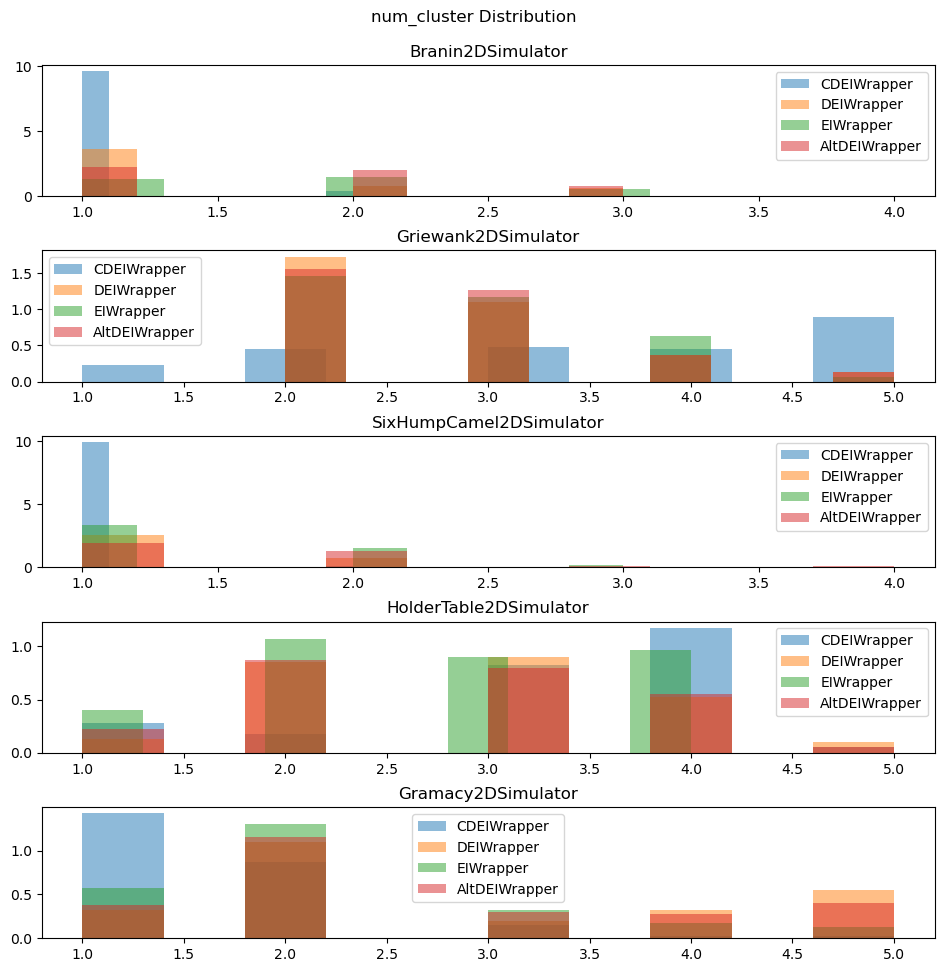

In [11]:
plotter_2d.plot_feature('num_cluster')

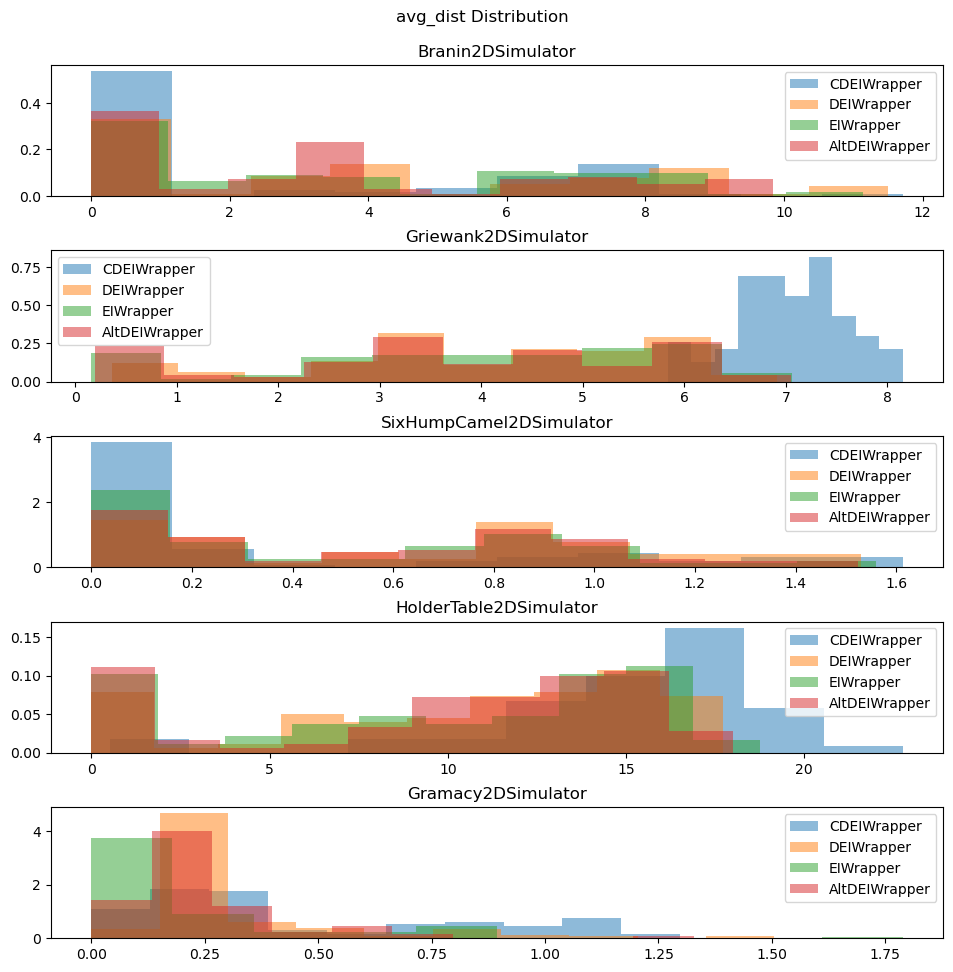

In [12]:
plotter_2d.plot_feature('avg_dist')

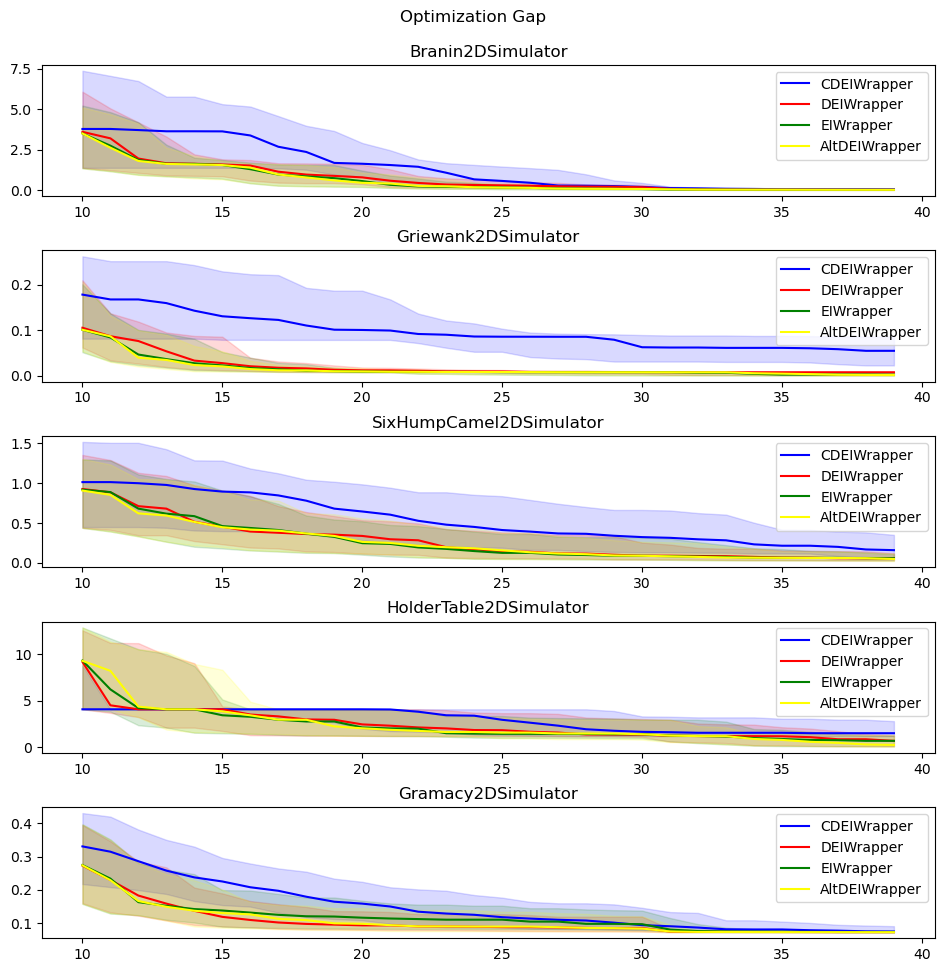

In [13]:
plotter_2d.plot_opt_gap(10)

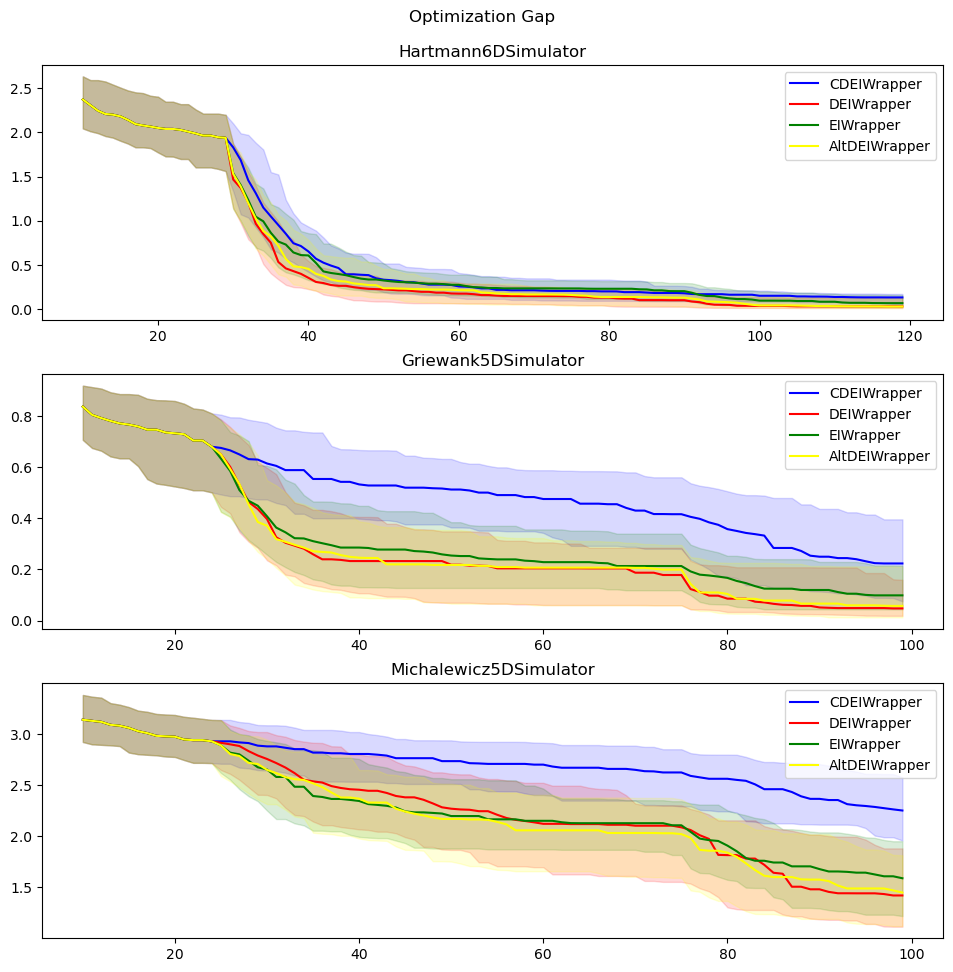

In [14]:
plotter_hd.plot_opt_gap(10)

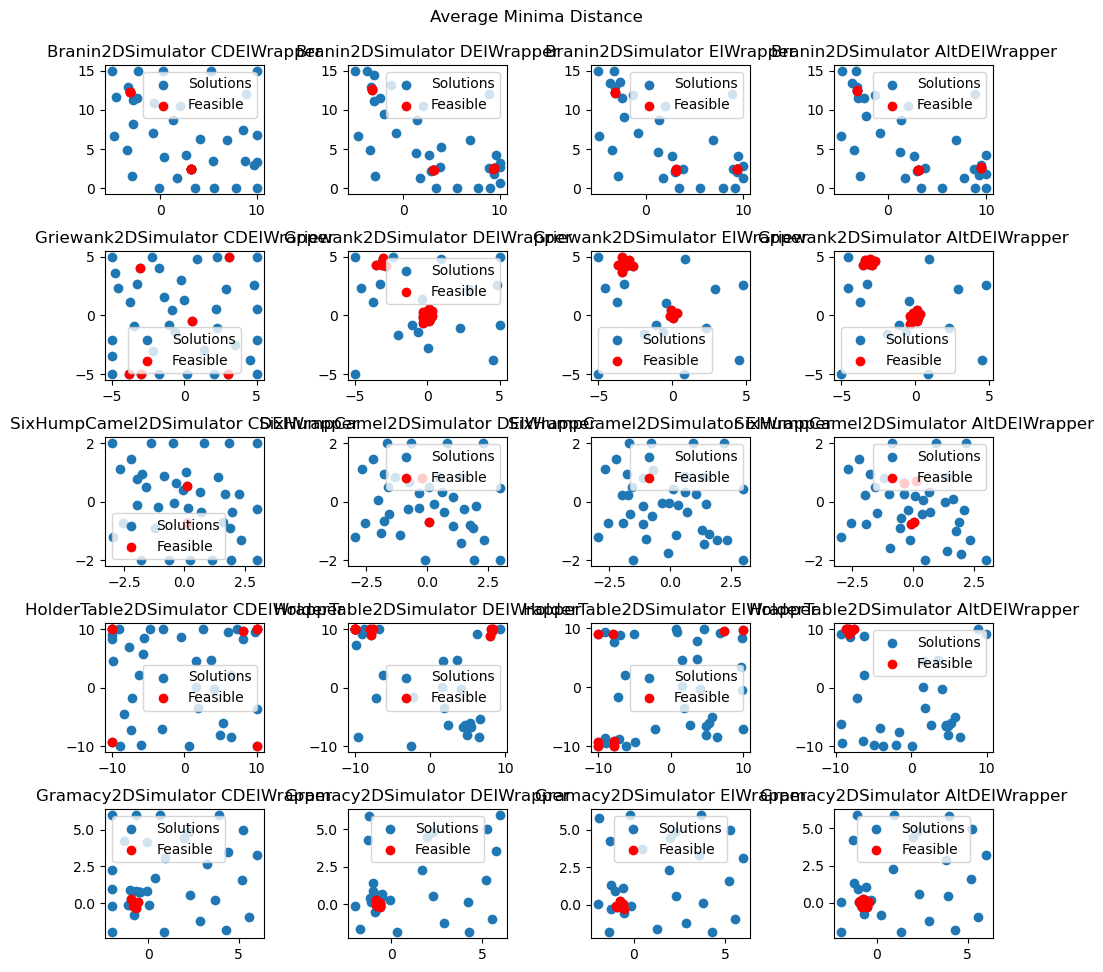

In [15]:
plotter_2d.plot_scatter_2d(2)

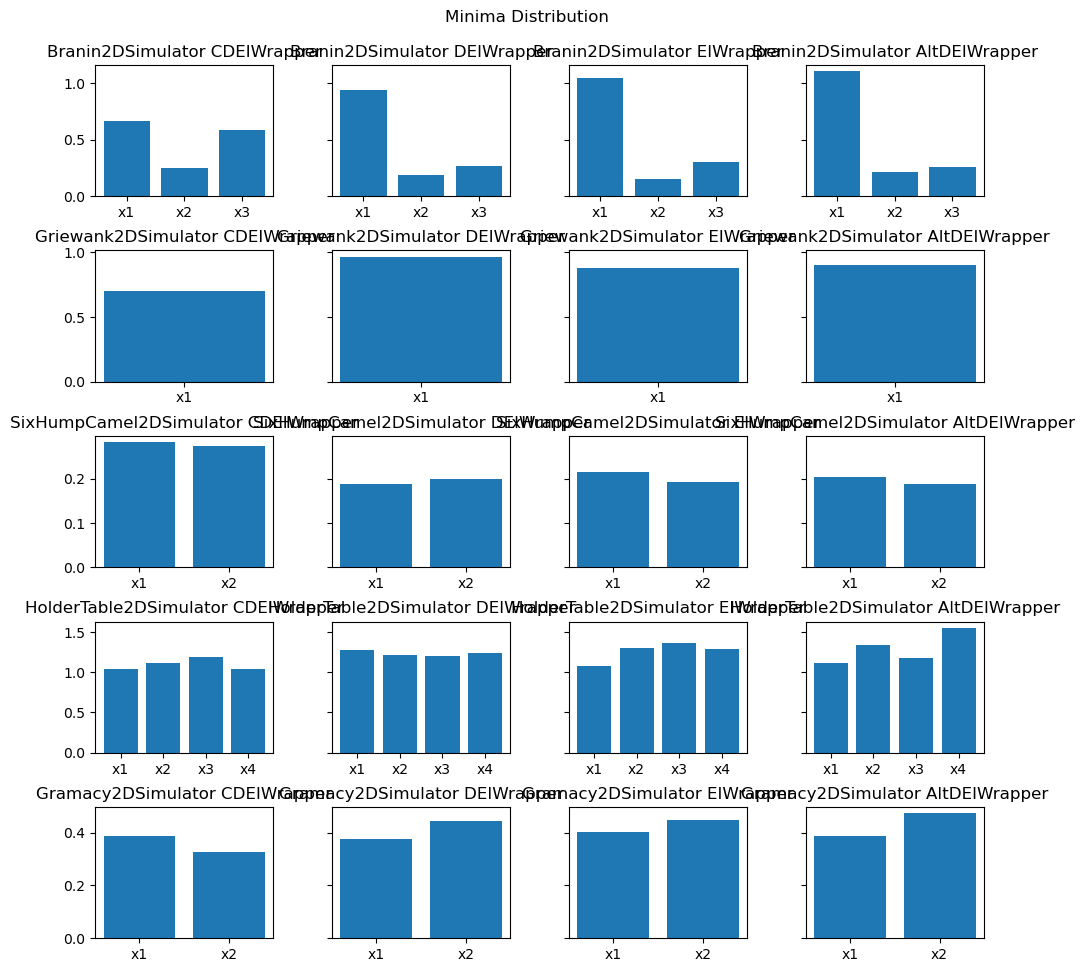

In [16]:
plotter_2d.plot_local_minima(minima_2d)

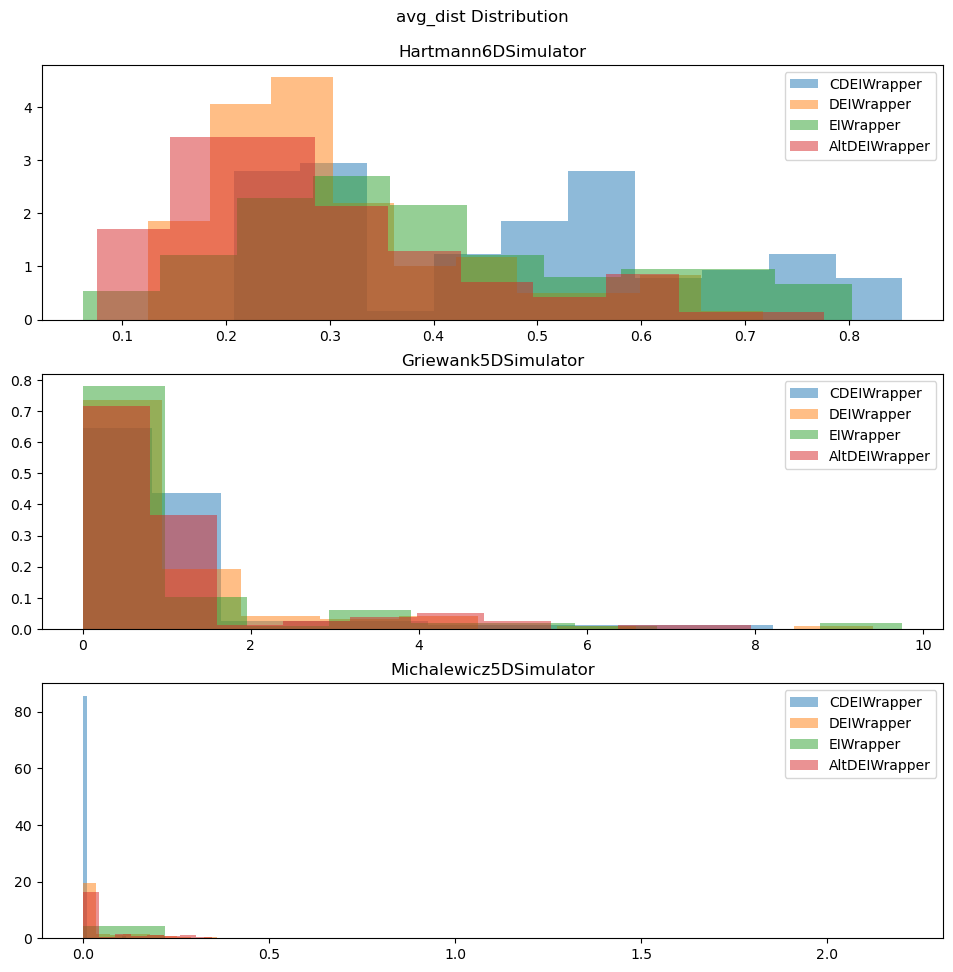

In [17]:
plotter_hd.plot_feature('avg_dist')

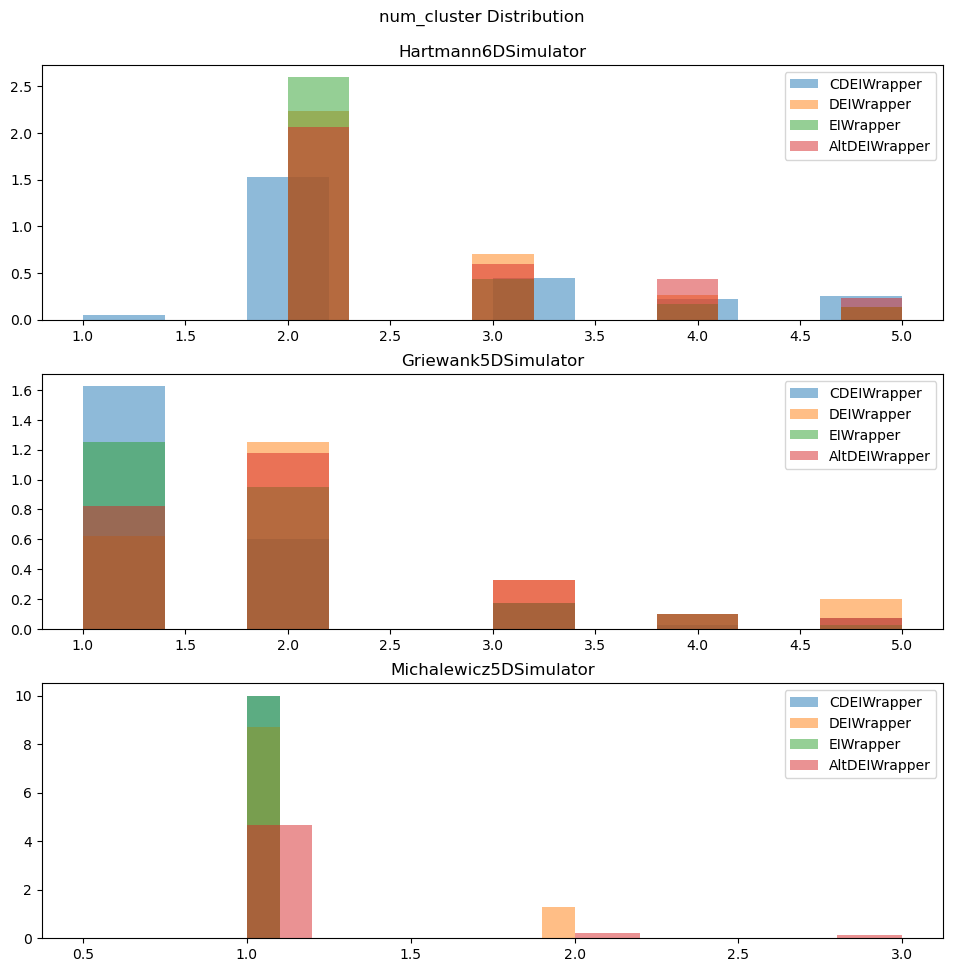

In [18]:
plotter_hd.plot_feature('num_cluster')

In [19]:
plotter_lunar.plot_max(

SyntaxError: unexpected EOF while parsing (2598608900.py, line 1)